# **Importing Necessary Package and Libraries**

In [1]:
import spacy
import pandas as pd
import re
from spacy.lang.en.stop_words import STOP_WORDS


The dataset in total has about 47,693 rows consisting of 6 classes of different types of social media tweets, indicating cyberbullying.

In [2]:
# Loading the dataset
file_path = '/content/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Sample rows from the cyberbullying_tweets dataset
print(df.head())


                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


To be noted here that the dataset here has two columns. As we can evidently see the first column which consists of tweet_text has data including username and other unwanted text data so we will move ahead with the

# **Data Preprocessing**

In [3]:
# Loading spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Tokenization, stopword removal, and lemmatization function
def process_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)


df['cleaned_text'] = df['tweet_text'].apply(clean_text)
df['processed_tokens'] = df['cleaned_text'].apply(process_text)





In [4]:
print(df[['tweet_text', 'cleaned_text', 'processed_tokens']].head())

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                        cleaned_text  \
0  In other words katandandre your food was crapi...   
1  Why is aussietv so white MKR theblock ImACeleb...   
2         a classy whore Or more red velvet cupcakes   
3   meh P  thanks for the heads up but not too co...   
4   This is an ISIS account pretending to be a Ku...   

                                    processed_tokens  
0             word katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                    classy whore red velvet cupcake  
3      meh p thank head concerned angry dude twitter  
4  isis account pretend kurdish account like isla..

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Applying Label Encoding to the cyberbullying_type column
df['label'] = label_encoder.fit_transform(df['cyberbullying_type'])

# Displaying the encoded labels and the corresponding class mappings
print(df[['cyberbullying_type', 'label']].head())


class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Class mappings: {class_mapping}")

  cyberbullying_type  label
0  not_cyberbullying      3
1  not_cyberbullying      3
2  not_cyberbullying      3
3  not_cyberbullying      3
4  not_cyberbullying      3
Class mappings: {'age': 0, 'ethnicity': 1, 'gender': 2, 'not_cyberbullying': 3, 'other_cyberbullying': 4, 'religion': 5}


In [7]:
# Saving the processed data to a new CSV file
processed_file_path = 'processed_tweets.csv'
df.to_csv(processed_file_path, index=False)


print(f"Processed file saved to: {processed_file_path}")


Processed file saved to: processed_tweets.csv


# **Data Analysis**

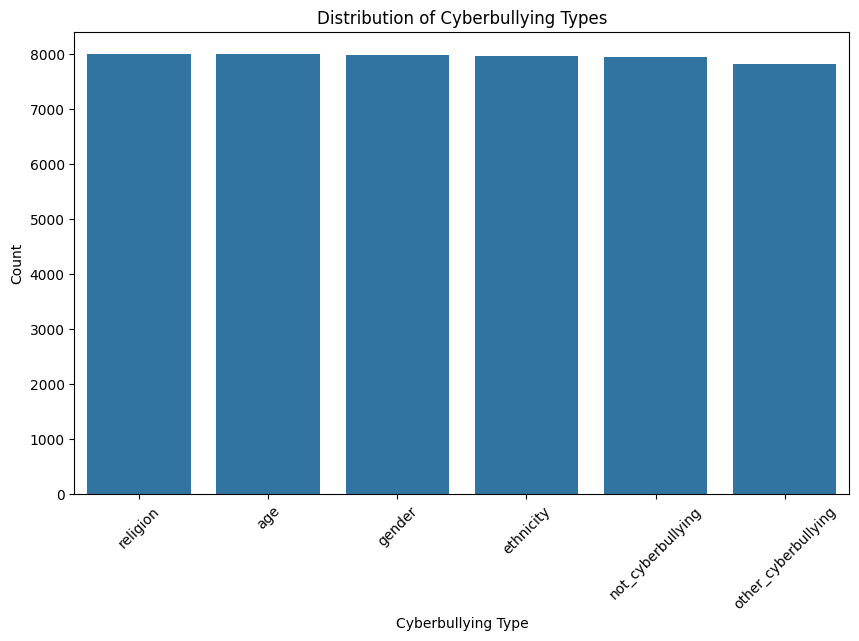

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of cyberbullying types
plt.figure(figsize=(10,6))
sns.countplot(x='cyberbullying_type', data=df, order=df['cyberbullying_type'].value_counts().index)
plt.title("Distribution of Cyberbullying Types")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


print(df['cyberbullying_type'].value_counts())


The dataset has been created in such a way as to avoid class imbalance the above plots justifies the same.

In [10]:
!pip install wordcloud


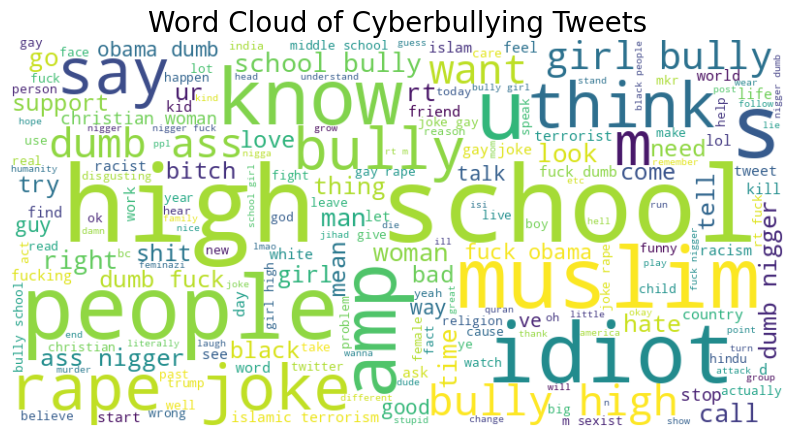

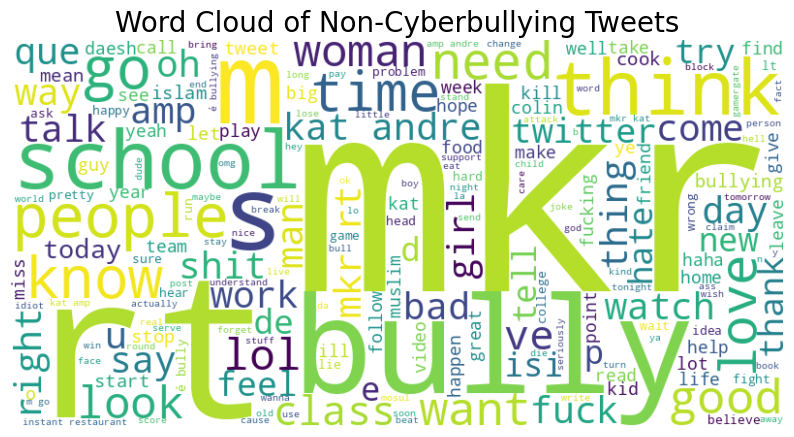

In [11]:
from wordcloud import WordCloud

# Function to create and display word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, size=20)
    plt.show()

# Separate cyberbullying and non-cyberbullying tweets
cyberbullying_tweets = df[df['cyberbullying_type'] != 'not_cyberbullying']['processed_tokens']
non_cyberbullying_tweets = df[df['cyberbullying_type'] == 'not_cyberbullying']['processed_tokens']

# Generate and display word clouds
generate_wordcloud(' '.join(cyberbullying_tweets), "Word Cloud of Cyberbullying Tweets")
generate_wordcloud(' '.join(non_cyberbullying_tweets), "Word Cloud of Non-Cyberbullying Tweets")


Wordcloud displaying commonly used words in the various instances if cyberbullying.

Most common words in cyberbullying tweets: [('not', 10563), ('bully', 9882), ('school', 8785), ('fuck', 6260), ('like', 5825), ('joke', 5508), ('nigger', 5428), ('girl', 5419), ('dumb', 5334), ('high', 5114), ('people', 4626), ('rape', 4463), ('gay', 4333), ('muslim', 4259), ('m', 4139), ('u', 3972), ('s', 3694), ('rt', 3526), ('idiot', 3419), ('woman', 2916)]
Most common words in non-cyberbullying tweets: [('mkr', 1692), ('not', 983), ('bully', 952), ('rt', 790), ('m', 504), ('like', 416), ('school', 377), ('s', 350), ('go', 297), ('kat', 290), ('think', 288), ('people', 273), ('amp', 258), ('know', 249), ('get', 247), ('good', 239), ('time', 224), ('bullying', 212), ('love', 200), ('andre', 194)]


<ipython-input-12-026ae3944319>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


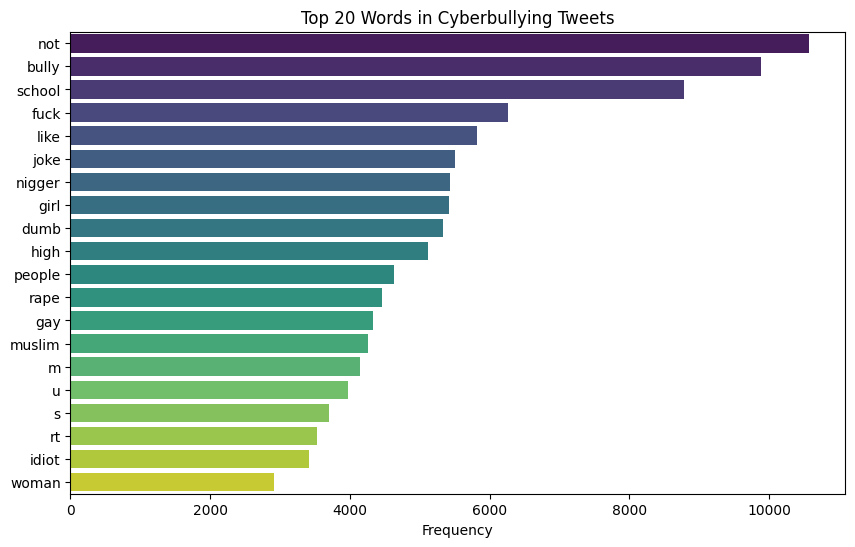

<ipython-input-12-026ae3944319>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


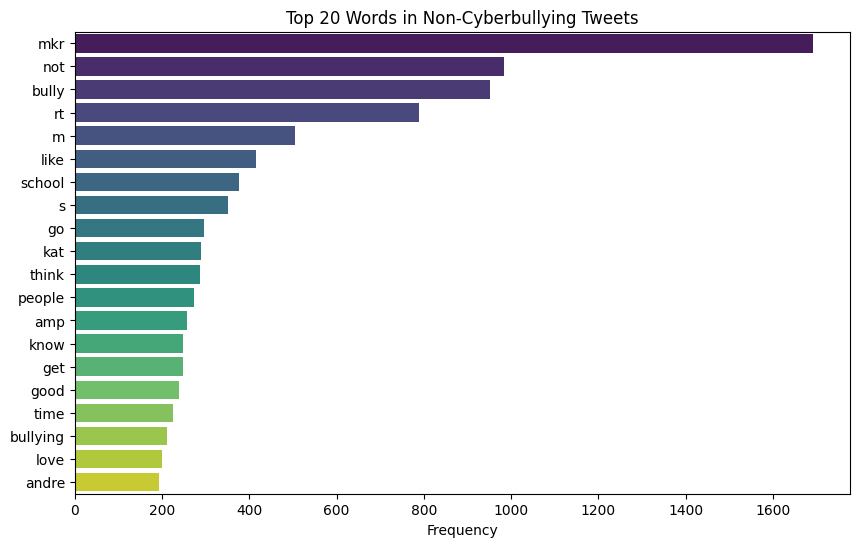

In [12]:
from collections import Counter

# Function to get the most common words
def most_common_words(text_series, num_words=20):
    all_words = ' '.join(text_series).split()
    counter = Counter(all_words)
    return counter.most_common(num_words)

# Most common words in cyberbullying tweets
cyberbullying_common_words = most_common_words(cyberbullying_tweets)
print("Most common words in cyberbullying tweets:", cyberbullying_common_words)

# Most common words in non-cyberbullying tweets
non_cyberbullying_common_words = most_common_words(non_cyberbullying_tweets)
print("Most common words in non-cyberbullying tweets:", non_cyberbullying_common_words)

# Plotting the most frequent words in each category
def plot_most_common_words(common_words, title):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

# Plot most common words for each category
plot_most_common_words(cyberbullying_common_words, "Top 20 Words in Cyberbullying Tweets")
plot_most_common_words(non_cyberbullying_common_words, "Top 20 Words in Non-Cyberbullying Tweets")


In [8]:
!pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# **NOTE: **

Model used here is TinyBert so as to achieve faster processing time with a large dataset and to maintain efficiency while running the code.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from datasets import Dataset

# Load the dataset (ensure it's already preprocessed as per previous steps)
df = pd.read_csv('processed_tweets.csv')
# Ensure the 'processed_tokens' column is of type string
df['processed_tokens'] = df['processed_tokens'].astype(str)

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['processed_tokens'], df['label'], test_size=0.2, random_state=42)

# Further split training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 validation

# Create DataFrames for train, validation, and test sets
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
val_df = pd.DataFrame({'text': X_val, 'label': y_val})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Preprocessed dataset is being used here
df = pd.read_csv('processed_tweets.csv')
df['processed_tokens'] = df['processed_tokens'].astype(str)

# Downsample to 1000 rows per class to ensure a smaller time interval
df_downsampled = df.groupby('label').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

# Split into training, validation, and testing sets (70% train, 15% validation, 15% test)
train_df, temp_df = train_test_split(df_downsampled, test_size=0.3, stratify=df_downsampled['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# Initialize the TinyBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
model = BertForSequenceClassification.from_pretrained('huawei-noah/TinyBERT_General_4L_312D', num_labels=6)

# Tokenization function with a specified max_length
def tokenize_function(examples):
    return tokenizer(examples['processed_tokens'], padding='max_length', truncation=True, max_length=128)

# Convert DataFrames to Hugging Face datasets and apply tokenization
train_dataset = Dataset.from_pandas(train_df).map(tokenize_function, batched=True)
val_dataset = Dataset.from_pandas(val_df).map(tokenize_function, batched=True)
test_dataset = Dataset.from_pandas(test_df).map(tokenize_function, batched=True)

# Set format for PyTorch tensors
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Training arguments for faster training
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,                        # Reduced epochs for faster training
    per_device_train_batch_size=16,            # Smaller batch size
    per_device_eval_batch_size=32,             # Larger batch size for evaluation
    evaluation_strategy="epoch",               # Evaluate at the end of each epoch
    save_strategy="epoch",                     # Save model every epoch
    logging_dir='./logs',                      # Logging directory
    logging_steps=50,                          # Log every 50 steps
    load_best_model_at_end=True,               # Load the best model at the end of training
    metric_for_best_model="eval_loss",         # Use eval loss as the metric for selecting the best model
    gradient_accumulation_steps=4,             # Accumulate gradients to simulate larger batch size
    use_cpu=True,                              # Use CPU instead of CUDA
    save_total_limit=1,                        # Keep only one checkpoint
)

# Define the Trainer
trainer = Trainer(
    model=model,                           # The TinyBERT model
    args=training_args,                    # Training arguments
    train_dataset=train_dataset,           # Training dataset
    eval_dataset=val_dataset               # Validation dataset
)

# Train the model
trainer.train()

# Evaluate the model on the test dataset
test_results = trainer.evaluate(test_dataset)

# Print evaluation results on the test set
print("Test evaluation results:", test_results)



<ipython-input-17-24a0919e3bd7>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_downsampled = df.groupby('label').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4200 [00:00<?, ? examples/s]

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,5.261100,1.191027


Test evaluation results: {'eval_loss': 1.1757001876831055, 'eval_runtime': 20.8582, 'eval_samples_per_second': 43.149, 'eval_steps_per_second': 1.39, 'epoch': 1.9733840304182508}


Here we can observe that the evaluation loss is: 1.175 which is considerably lesser for a real world dataset.

In [18]:
# Save the trained model
model.save_pretrained('./fine_tuned_model')
tokenizer.save_pretrained('./fine_tuned_model')



('./fine_tuned_model/tokenizer_config.json',
 './fine_tuned_model/special_tokens_map.json',
 './fine_tuned_model/vocab.txt',
 './fine_tuned_model/added_tokens.json')

In [22]:
# Loading the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained('./fine_tuned_model', num_labels=6)
tokenizer = BertTokenizer.from_pretrained('./fine_tuned_model')

# Define the class mappings based on previously provided values
class_mappings = {
    0: 'age',
    1: 'ethnicity',
    2: 'gender',
    3: 'not_cyberbullying',
    4: 'other_cyberbullying',
    5: 'religion'
}


def predict_cyberbullying_type(text):
    # Tokenize the input text
    inputs = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors="pt")

    # Ensure the model is in evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Get the predicted label (class)
    predicted_class = torch.argmax(logits, dim=-1).item()

    return predicted_class

# Function to generate summary
def generate_summary(text):

    predicted_class = predict_cyberbullying_type(text)


    predicted_cyberbullying = class_mappings[predicted_class]

    summary = f"Cyberbullying Type: {predicted_cyberbullying}\nVictim's Description: {text}"

    return summary

# Example victim descriptions (this can be taken from your dataset or any new data)
victim_descriptions = [
    "I received a call from someone pretending to be from my bank and asking for my account details.",
    "I clicked on a link in an email and my personal information was stolen.",
    "My social media account was hacked and all my posts were deleted.",
    "know that Im Asian too you bitch.But just know that a nigger is a lot more educated than you. You dumb fuck",
     "it's disrespectful to call a female a bitch",
    "everything but mostly my priest"
]

# Generating summaries for each victim description
for description in victim_descriptions:
    summary = generate_summary(description)
    print(summary)
    print("\n" + "-"*50 + "\n")

Cyberbullying Type: other_cyberbullying
Victim's Description: I received a call from someone pretending to be from my bank and asking for my account details.

--------------------------------------------------

Cyberbullying Type: other_cyberbullying
Victim's Description: I clicked on a link in an email and my personal information was stolen.

--------------------------------------------------

Cyberbullying Type: other_cyberbullying
Victim's Description: My social media account was hacked and all my posts were deleted.

--------------------------------------------------

Cyberbullying Type: ethnicity
Victim's Description: know that Im Asian too you bitch.But just know that a nigger is a lot more educated than you. You dumb fuck

--------------------------------------------------

Cyberbullying Type: gender
Victim's Description: it's disrespectful to call a female a bitch

--------------------------------------------------

Cyberbullying Type: other_cyberbullying
Victim's Description: 

In [26]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import Trainer

# Load the fine-tuned model (assuming it's already saved or you load it directly)
model = BertForSequenceClassification.from_pretrained('./fine_tuned_model', num_labels=6)  # Replace with the path to your model
tokenizer = BertTokenizer.from_pretrained('./fine_tuned_model')

# Define the Trainer
trainer = Trainer(
    model=model,                               # The fine-tuned model
    eval_dataset=test_dataset,                 # The test dataset
)

# Get predictions from the model on the test dataset
predictions, label_ids, _ = trainer.predict(test_dataset)

# Convert logits to predicted classes
predicted_classes = torch.argmax(torch.tensor(predictions), dim=-1)

# Get the true labels
true_labels = torch.tensor(label_ids)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_classes)

# Calculate precision, recall, F1-score for multi-class classification
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_classes, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Test Accuracy: 72.89%
Precision: 0.84
Recall: 0.73
F1-score: 0.68


# **Conclusion:**

Based on the evaluation metrics of my fine-tuned TinyBERT model, the performance appears to be both reasonable and balanced, especially for a classification task with a balanced dataset. Here's a breakdown of the results:

**Accuracy (72.89%):**

An accuracy of around 73% indicates that the model is correctly predicting the class labels for nearly three-quarters of the test samples. Since the dataset is balanced, this accuracy suggests that the model is making meaningful predictions rather than favoring any particular class.

**Precision (0.84):**

The precision score of 0.84 shows that when the model predicts a class, it is correct 84% of the time. This is an important metric, especially when we want to minimize false positives (wrongly identifying an instance as belonging to a class). This result is particularly useful in tasks where misclassifying a sample as a certain class could be costly, like spam detection.

**Recall (0.73):**

With a recall score of 0.73, the model is correctly identifying 73% of the actual positive instances. While recall is slightly lower than precision, it still shows that the model is effective at capturing most of the relevant positive cases. There's potential to improve this metric further, especially if the task requires capturing as many positives as possible.

F1-score (0.68): **bold text**

The F1-score of 0.68 reflects a decent balance between precision and recall. Although this score is reasonable, there's room for improvement if the task requires a more equal trade-off between false positives and false negatives.
Why These Metrics Are Reasonable:
Balanced Dataset: Since the dataset is balanced, accuracy provides meaningful feedback on the model's overall performance. However, I also took into account metrics like precision, recall, and F1-score to gain a deeper understanding of how the model is performing, particularly with respect to each class. The higher precision indicates the model is cautious in making positive predictions, which is a good thing in many real-world scenarios.

# **Practical Applicability:**

 In the context of real-world tasks, these metrics show that the model is performing at a reasonable level. The fact that TinyBERT, a smaller model, can achieve these results is quite promising, indicating that fine-tuning has been successful. The results suggest that the model is neither overfitting nor underperforming and that the fine-tuning process was effective.

**Areas for Improvement:**

Recall: Although recall is decent, there’s still room for improvement. A higher recall would ensure that the model identifies even more true positives, which would be particularly important if missing a positive case is costly.

F1-score Optimization: While the current F1-score is acceptable, further optimization of the model, such as experimenting with different hyperparameters or decision thresholds, could improve the balance between precision and recall.